# 얼굴에 고양이 수염 스티커 붙이기
## 1) 필요한 패키지 임포트

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import dlib

## 2) 이미지 불러오기

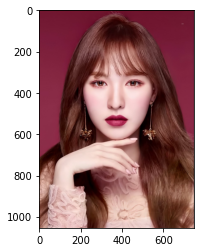

In [2]:
img_dir = os.getenv('HOME')+'/aiffel/enode3/camera_sticker/images/'
img_path = os.getenv('HOME')+'/aiffel/enode3/camera_sticker/images/wendy.jpg'
img_bgr = cv2.imread(img_path)
img_show = img_bgr.copy()
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 3)얼굴 검출

### 3-1) bounding box 추출
- `dlib` 이용

In [3]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1) # 이미지 피라미드 값

In [4]:
# 찾은 얼굴영역 좌표
print(dlib_rects)

rectangles[[(205, 277) (526, 598)]]


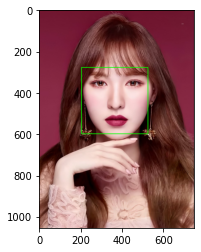

In [5]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show,(l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 3-2) 랜드마크 검출

In [6]:
model_path = os.getenv('HOME')+'/aiffel/enode3/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

- `landmark_predictor(img, dlib.rectangle)` : `dlib.full_object_detection` 반환

In [7]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb,dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


- `dlib.full_object_detection` 객체의 멤버함수인 `parts()`로 개별 위치에 접근

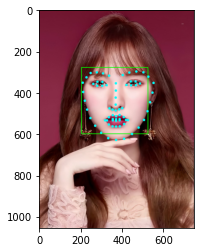

In [8]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 6, (255,255,0), -1) # blue

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 4) 스티커 적용 위치 계산

In [9]:
%ls -al camera_sticker/images

total 2176
drwxr-xr-x 3 root root   4096 Jul 27 10:58 ./
drwxr-xr-x 4 root root   4096 Jul 20 01:35 ../
-rw-r--r-- 1 root root   5324 Jul 20 05:13 cat-whiskers.png
-rw-r--r-- 1 root root  90270 Jul 27 10:03 enwoo.jpg
-rw-r--r-- 1 root root  93304 Jul 20 01:37 face.jpg
-rw-r--r-- 1 root root  42963 Sep  2  2020 hero.png
-rw-r--r-- 1 root root  31517 Jul 27 04:19 hwasa.jpg
-rw-r--r-- 1 root root 363552 Jul 20 02:04 image.png
drwxr-xr-x 2 root root   4096 Jul 27 10:58 .ipynb_checkpoints/
-rw-r--r-- 1 root root  58489 Jul 27 10:03 iriene.jpg
-rw-r--r-- 1 root root 224454 Jul 27 10:03 jaeseok.bmp
-rw-r--r-- 1 root root 337877 Jul 27 10:03 jongsuck.png
-rw-r--r-- 1 root root  13511 Sep  2  2020 king.png
-rw-r--r-- 1 root root  47351 Jul 27 10:03 minho.jpg
-rw-r--r-- 1 root root   8842 Jul 20 05:13 moustache.png
-rw-r--r-- 1 root root 661438 Jul 27 10:03 songgang.png
-rw-r--r-- 1 root root  23753 Jul 27 10:03 suckcheon.jpg
-rw-r--r-- 1 root root  25895 Jul 27 10:03 sungjae.jpg
-rw-r--r-- 1 ro

### 4-0) 바운딩 박스 크기 및 랜드마크 좌표 변수 만들기

In [10]:
print(dlib_rects)
print(list_landmarks)
print(len(list_landmarks[0]))
dlib_rect = dlib_rects[0]
landmarks = list_landmarks[0]
print(dlib_rect)
print(landmarks)

rectangles[[(205, 277) (526, 598)]]
[[(211, 351), (213, 396), (221, 438), (232, 481), (248, 522), (271, 559), (300, 593), (334, 619), (372, 628), (411, 622), (449, 599), (481, 568), (507, 531), (524, 489), (536, 445), (548, 399), (553, 352), (229, 325), (249, 304), (279, 301), (309, 306), (338, 317), (404, 314), (436, 302), (470, 297), (504, 301), (528, 322), (371, 354), (371, 389), (370, 423), (370, 457), (340, 475), (355, 481), (370, 485), (387, 480), (402, 474), (262, 357), (282, 346), (306, 347), (326, 363), (305, 366), (281, 366), (422, 362), (443, 345), (466, 345), (487, 355), (468, 363), (444, 364), (319, 533), (337, 518), (356, 508), (372, 513), (389, 507), (409, 517), (429, 532), (411, 551), (390, 562), (372, 563), (355, 562), (337, 553), (328, 533), (356, 527), (372, 528), (389, 527), (420, 531), (389, 533), (372, 535), (356, 533)]]
68
[(205, 277) (526, 598)]
[(211, 351), (213, 396), (221, 438), (232, 481), (248, 522), (271, 559), (300, 593), (334, 619), (372, 628), (411, 622

### 4-1) 왼쪽 볼 좌표와 코 중심 좌표 이용

- 스티커 위치

$$x=x_{인중} \\
y=y_{인중}$$

- 스티커 크기

$$width=height=width_{bbox}$$

#### try1) 왼쪽 선으로

In [11]:
x = landmark[33][0]
y = landmark[33][1] - dlib_rect.width()//2
w = dlib_rect.width()
h = dlib_rect.height()
print(f'(x, y) : {x}, {y}')
print(f'(w, h) : {w}, {h}')

(x, y) : 370, 324
(w, h) : 322, 322


In [12]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[33])
    x = landmark[33][0]
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.height()
    print(f'(x, y) : {x}, {y}')
    print(f'(w, h) : {w}, {h}')

(370, 485)
(x, y) : 370, 485
(w, h) : 322, 322


In [13]:
sticker_path = os.getenv('HOME')+'/aiffel/enode3/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(322, 322, 3)


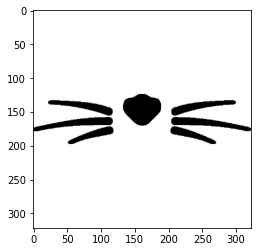

In [14]:
plt.imshow(img_sticker)
plt.show()

- 이미지 붙일 top-left 좌표 구하기

In [15]:
# x,y 좌표 조정
refined_x = x - w // 2
# y 좌표는 원본 이미지의 경계 값
refined_y = y - img_sticker.shape[1]//2
print(f'refined_x and y : {refined_x}, {refined_y}')

refined_x and y : 209, 324


### 스티커 붙일 위치 확인

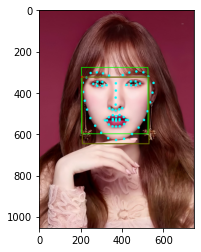

In [16]:
cv2.circle(img_show, (refined_x,refined_y), 6, (0,0,255), -1) # blue
cv2.rectangle(img_show,(refined_x,refined_y), (refined_x+img_sticker.shape[1], refined_y+img_sticker.shape[0]), (0,100,100), 4, lineType=cv2.LINE_AA)
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [17]:
# 자른 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

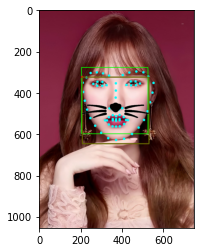

In [18]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))

## 5) 스티커 적용
- `png` 확장자의 스티커를 기본 `cv2.imread`로 읽어왔기 때문에 투명성을 잃고 투명했던 부분의 픽셀값을 확인해보면 세 채널 다 255인 것을 알 수 있다.
- 즉, 스티커인 부분은 픽셀 값이 0일 것이고, 스티커가 아닌 부분은 픽셀 값이 255일 것이다.
- `np.where()`를 이용해 스티커가 아닌 부분은 원 이미지 픽셀 값을 사용하고 그 외에는 스티커의 픽셀 값을 사용한다.

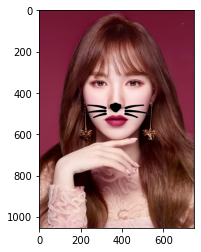

In [19]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 함수화

In [20]:
def put_sticker(img_name, sticker_name):
    fig = plt.figure(figsize=(10,8))
    rows = 2
    cols = 2
    img_dir = os.getenv('HOME')+'/aiffel/enode3/camera_sticker/images/'
    img_path = img_dir+img_name
    sticker_path = img_dir+sticker_name
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_show = img_rgb.copy()

    # 얼굴 바운딩 박스 검출
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rect = detector_hog(img_rgb, 1)[0]

    # 바운딩 박스 영역 출력
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_rgb, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)
    sub1 = fig.add_subplot(rows,cols,1)
    sub1.imshow(img_rgb)
    sub1.set_title('Bounding Box')
    
    # 랜드마크 검출
    model_path = os.getenv('HOME')+'/aiffel/enode3/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    list_landmarks = []
    points = landmark_predictor(img_rgb,dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
    landmark = list_landmarks[0]
    for idx, point in enumerate(list_points):
        cv2.circle(img_rgb, point, 6, (255,255,0), -1)
    sub2 = fig.add_subplot(rows,cols,2)
    sub2.imshow(img_rgb)
    sub2.set_title('Landmarks')

    # 인중 중심 좌표 잡기
    w = dlib_rect.width()
    h = dlib_rect.height()
    x = landmark[33][0]
    y = landmark[33][1]
    
    print(f'(x, y) : {x}, {y}')
    print(f'(w, h) : {w}, {h}')

    # 스티커 이미지 가져오기
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    print (img_sticker.shape)
    '''plt.imshow(img_sticker)
    plt.show()'''

    # 실제 출력을 위한 top-left 좌표 구하기
    refined_x = x - img_sticker.shape[0] // 2
    # y 좌표는 볼쪽 경계 값 보다 이미지 사이즈 절반 위
    refined_y = y - img_sticker.shape[1]//2
    print(f'refined_x and y : {refined_x}, {refined_y}')

    # 스티커 붙일 위치 확인
    cv2.circle(img_rgb, (refined_x,refined_y), 6, (0,0,255), -1) # blue
    cv2.rectangle(img_rgb,(refined_x,refined_y), (refined_x+img_sticker.shape[1], refined_y+img_sticker.shape[0]), (0,100,100), 4, lineType=cv2.LINE_AA)
    sub3 = fig.add_subplot(rows,cols,3)
    sub3.imshow(img_rgb)
    sub3.set_title('sticker coordinate')
    

    # 실제 적용
    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
    sub4 = fig.add_subplot(rows,cols,4)
    sub4.imshow(img_show)
    sub4.set_title('completed')
    
    plt.show()

(x, y) : 243, 213
(w, h) : 187, 187
(187, 187, 3)
refined_x and y : 150, 120


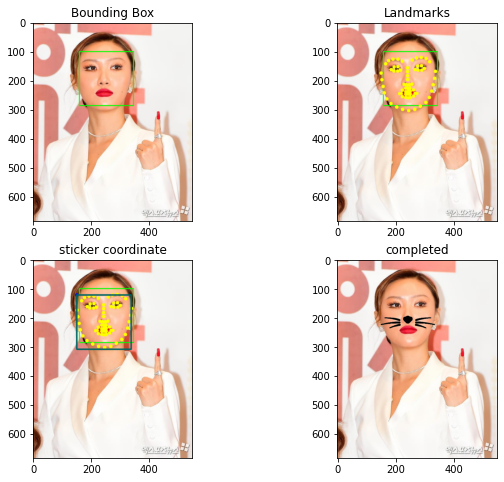

In [21]:
put_sticker('hwasa.jpg','cat-whiskers.png')

(x, y) : 369, 485
(w, h) : 322, 322
(322, 322, 3)
refined_x and y : 208, 324


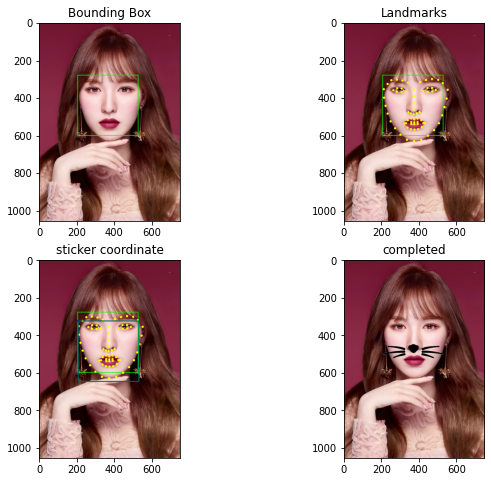

In [22]:
put_sticker('wendy.jpg','cat-whiskers.png')

(x, y) : 327, 688
(w, h) : 555, 556
(556, 555, 3)
refined_x and y : 49, 411


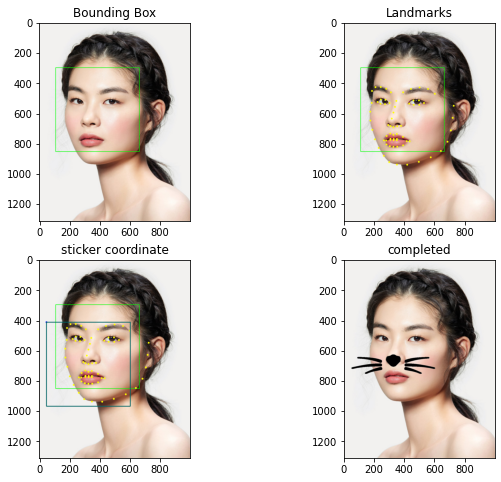

In [23]:
put_sticker('face.jpg','cat-whiskers.png')

(x, y) : 439, 200
(w, h) : 187, 187
(187, 187, 3)
refined_x and y : 346, 107


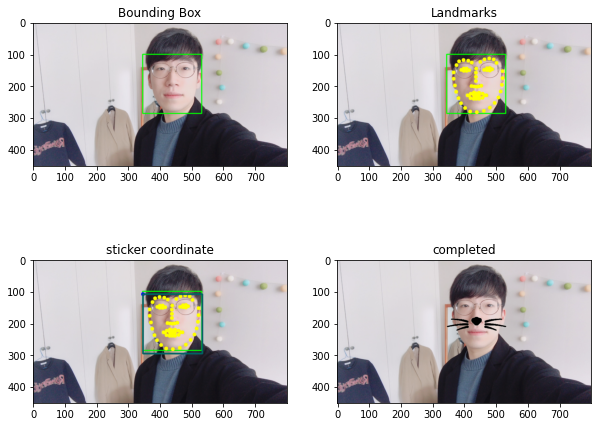

In [24]:
put_sticker('image.png','cat-whiskers.png')

## 6)문제점 찾기
- 얼굴 각도에 따라 스티커 변화
- 멀리서 촬영하거나 옆으로 누워서 촬영할 경우
- 실행 속도
- 요구되는 정확도

## 6-1-1) 얼굴 각도

- 얼굴이 회전된 경우
인중 부분에 스티커를 붙여서 얼굴 각도가 회전된 경우 잘 맞지 않는다

(x, y) : 140, 168
(w, h) : 130, 130
(130, 130, 3)
refined_x and y : 75, 103


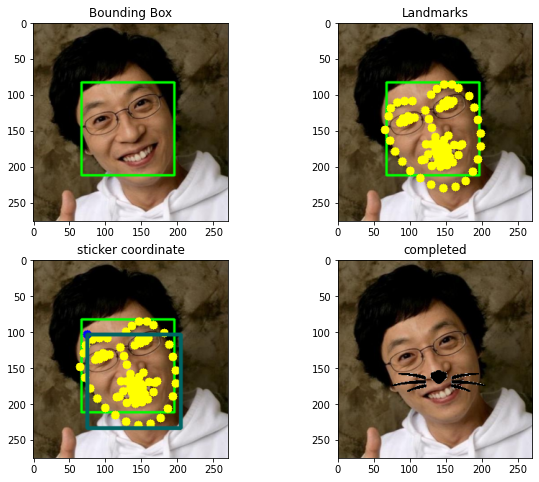

In [25]:
put_sticker('jaeseok.bmp','cat-whiskers.png')

(x, y) : 443, 266
(w, h) : 186, 186
(186, 186, 3)
refined_x and y : 350, 173


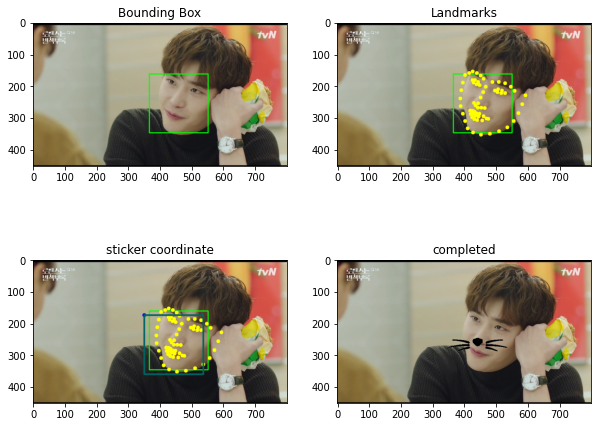

In [26]:
put_sticker('jongsuck.png','cat-whiskers.png')

## 6-1-2) 개선 방안
- 인중 외에 스티커의 왼쪽 끝이 볼 랜드마크에 닿을 수 있도록 회전시켜보자
### 1차시도
- 볼 부분 랜드마크를 기준점으로 각도를 구해서 `cv2.getRotationMatrix2D()`를 이용해 회전시켜보자
```
    # 실제 출력을 위한 top-left 좌표 구하기
    refined_x = x - img_sticker.shape[0] // 2
    # y 좌표는 볼쪽 경계 값 보다 이미지 사이즈 절반 위
    refined_y = y - img_sticker.shape[1]//2
    print(f'refined_x and y : {refined_x}, {refined_y}')

    # 회전할 기준점 잡기
    p1_x = refined_x
    p1_y = refined_y

    p2_x = landmark[6][0]
    p2_y = landmark[6][1]
 ```

In [27]:
def rotate_sticker(img_name):
    fig = plt.figure(figsize=(10,8))
    rows = 2
    cols = 2
    img_dir = os.getenv('HOME')+'/aiffel/enode3/camera_sticker/images/'
    img_path = img_dir+img_name
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_show = img_rgb.copy()
    # 얼굴 바운딩 박스 검출
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rect = detector_hog(img_rgb, 1)[0]

    # 바운딩 박스 영역 출력
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_rgb, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

    # 랜드마크 검출
    model_path = os.getenv('HOME')+'/aiffel/enode3/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    list_landmarks = []
    points = landmark_predictor(img_rgb,dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    landmark = list_landmarks[0]
    for idx, point in enumerate(list_points):
        cv2.circle(img_rgb, point, 6, (255,255,0), -1)
    sub1 = fig.add_subplot(rows,cols,1)
    sub1.imshow(img_rgb)
    sub1.set_title('Bounding Box and Landmarks')


    # 인중 중심 좌표 잡기
    w = dlib_rect.width()
    h = dlib_rect.height()
    x = landmark[33][0]
    y = landmark[33][1]

    # 스티커 이미지 가져오기
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    print (f'스티커 사이즈 : {img_sticker.shape}')

    # 실제 출력을 위한 top-left 좌표 구하기
    refined_x = x - img_sticker.shape[0] // 2
    # y 좌표는 볼쪽 경계 값 보다 이미지 사이즈 절반 위
    refined_y = y - img_sticker.shape[1]//2
    print(f'refined_x and y : {refined_x}, {refined_y}')

    # 회전할 기준점 잡기
    p1_x = refined_x
    p1_y = refined_y

    p2_x = landmark[6][0]
    p2_y = landmark[6][1]

    print(f'(x, y) : {x}, {y}')
    print(f'(w, h) : {w}, {h}')
    print(f'(p1_x, p1_y) : {x}, {y}')
    print(f'(x, y) : {x}, {y}')

    import math

    row, col = img_sticker.shape[:2]
    angle = math.degrees(math.atan2(p2_x-p1_x,p2_y-p1_y))

    # 반시계 방향으로 회전해야 할 경우
    if (p2_y-p1_y < 0):
        angle = -angle
    print(f'angle : {angle}')
    rot = cv2.getRotationMatrix2D((col/2, row/2), angle, 1)
    dst = cv2.warpAffine(img_sticker, rot, (col, row), borderValue=(255,255,255))

    sub2 = fig.add_subplot(row,col,2)
    sub2.imshow(dst)
    sub2.set_title('Sticker')


    # 스티커 붙일 위치 확인
    cv2.circle(img_rgb, (refined_x,refined_y), 6, (0,0,255), -1) # blue
    cv2.rectangle(img_rgb,(refined_x,refined_y), 
                  (refined_x+dst.shape[1], refined_y+dst.shape[0]), (0,100,100), 4, lineType=cv2.LINE_AA)
    sub3 = fig.add_subplot(rows,cols,3)
    sub3.imshow(img_rgb)
    sub3.set_title('Sticker Coordinate')


    # 실제 적용
    sticker_area = img_show[refined_y:refined_y+dst.shape[0], refined_x:refined_x+dst.shape[1]]
    img_show[refined_y:refined_y+dst.shape[0], refined_x:refined_x+dst.shape[1]] = \
    np.where(dst==255,sticker_area,dst).astype(np.uint8)

    sub4 = fig.add_subplot(rows,cols,4)
    sub4.imshow(img_show)
    sub4.set_title('Completed')
    plt.show()

스티커 사이즈 : (130, 130, 3)
refined_x and y : 75, 103
(x, y) : 140, 168
(w, h) : 130, 130
(p1_x, p1_y) : 140, 168
(x, y) : 140, 168
angle : 24.050298529605158


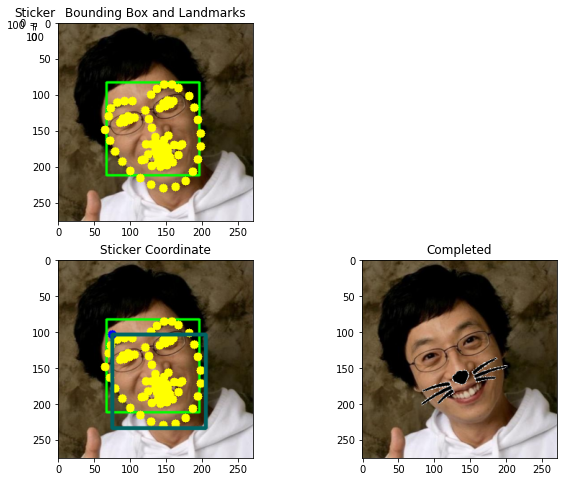

In [28]:
rotate_sticker('jaeseok.bmp')

## 6-1-3) 발견된 문제점

스티커 사이즈 : (186, 186, 3)
refined_x and y : 350, 173
(x, y) : 443, 266
(w, h) : 186, 186
(p1_x, p1_y) : 443, 266
(x, y) : 443, 266
angle : 21.43460412941803


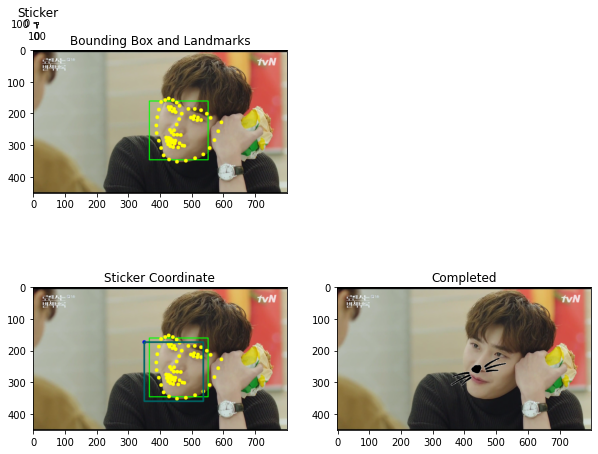

In [29]:
rotate_sticker('jongsuck.png')

- 왜 오른쪽으로 기울어진 사진과 왼쪽으로 기울어진 사진에서 한쪽 방향으로만 각도가 기울까?
- 해결해 보기위해 기준점 좌표의 y와 회전해야할 좌표의 y의 차가 양수인지 음수인지에 따라 각도를 양수, 음수로 변환해주고자 하였으나 역시 그대로였다.
```
    if (p2_y-p1_y < 0):
        angle = -angle
```

- 양쪽 턱 랜드마크의 y좌표 차이를 사용해보자.
``` p2_x = landmark[6][0]
    p2_y = landmark[6][1]
    
    p3_x = landmark[10][0]
    p3_y = landmark[10][1]

    print(f'(x, y) : {x}, {y}')
    print(f'(w, h) : {w}, {h}')
    print(f'(p1_x, p1_y) : {x}, {y}')
    print(f'(x, y) : {x}, {y}')

    import math

    row, col = img_sticker.shape[:2]
    angle = math.degrees(math.atan2(p2_x-p1_x,p2_y-p1_y))

    # 반시계 방향으로 회전해야 할 경우
    if (p3_y-p2_y > 0):
        angle = -angle
 ```

In [30]:
def rotate_sticker_2(img_name):
    fig = plt.figure(figsize=(10,8))
    rows = 2
    cols = 2
    img_dir = os.getenv('HOME')+'/aiffel/enode3/camera_sticker/images/'
    img_path = img_dir+img_name
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_show = img_rgb.copy()
    # 얼굴 바운딩 박스 검출
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rect = detector_hog(img_rgb, 1)[0]

    # 바운딩 박스 영역 출력
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_rgb, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

    # 랜드마크 검출
    model_path = os.getenv('HOME')+'/aiffel/enode3/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    list_landmarks = []
    points = landmark_predictor(img_rgb,dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    landmark = list_landmarks[0]
    for idx, point in enumerate(list_points):
        cv2.circle(img_rgb, point, 6, (255,255,0), -1)
    sub1 = fig.add_subplot(rows,cols,1)
    sub1.imshow(img_rgb)
    sub1.set_title('Bounding Box and Landmarks')


    # 인중 중심 좌표 잡기
    w = dlib_rect.width()
    h = dlib_rect.height()
    x = landmark[33][0]
    y = landmark[33][1]

    # 스티커 이미지 가져오기
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    print (f'스티커 사이즈 : {img_sticker.shape}')

    # 실제 출력을 위한 top-left 좌표 구하기
    refined_x = x - img_sticker.shape[0] // 2
    # y 좌표는 볼쪽 경계 값 보다 이미지 사이즈 절반 위
    refined_y = y - img_sticker.shape[1]//2
    print(f'refined_x and y : {refined_x}, {refined_y}')

    # 회전할 기준점 잡기
    p1_x = refined_x
    p1_y = refined_y

    p2_x = landmark[6][0]
    p2_y = landmark[6][1]
    
    p3_x = landmark[10][0]
    p3_y = landmark[10][1]

    print(f'(x, y) : {x}, {y}')
    print(f'(w, h) : {w}, {h}')
    print(f'(p1_x, p1_y) : {x}, {y}')
    print(f'(x, y) : {x}, {y}')

    import math

    row, col = img_sticker.shape[:2]
    angle = math.degrees(math.atan2(p2_x-p1_x,p2_y-p1_y))

    # 반시계 방향으로 회전해야 할 경우
    if (p3_y-p2_y > 0):
        angle = -angle
    print(f'angle : {angle}')
    rot = cv2.getRotationMatrix2D((col/2, row/2), angle, 1)
    dst = cv2.warpAffine(img_sticker, rot, (col, row), borderValue=(255,255,255))

    sub2 = fig.add_subplot(row,col,2)
    sub2.imshow(dst)
    sub2.set_title('Sticker')


    # 스티커 붙일 위치 확인
    cv2.circle(img_rgb, (refined_x,refined_y), 6, (0,0,255), -1) # blue
    cv2.rectangle(img_rgb,(refined_x,refined_y), 
                  (refined_x+dst.shape[1], refined_y+dst.shape[0]), (0,100,100), 4, lineType=cv2.LINE_AA)
    sub3 = fig.add_subplot(rows,cols,3)
    sub3.imshow(img_rgb)
    sub3.set_title('Sticker Coordinate')


    # 실제 적용
    sticker_area = img_show[refined_y:refined_y+dst.shape[0], refined_x:refined_x+dst.shape[1]]
    img_show[refined_y:refined_y+dst.shape[0], refined_x:refined_x+dst.shape[1]] = \
    np.where(dst==255,sticker_area,dst).astype(np.uint8)

    sub4 = fig.add_subplot(rows,cols,4)
    sub4.imshow(img_show)
    sub4.set_title('Completed')
    plt.show()

스티커 사이즈 : (186, 186, 3)
refined_x and y : 350, 173
(x, y) : 443, 266
(w, h) : 186, 186
(p1_x, p1_y) : 443, 266
(x, y) : 443, 266
angle : -21.43460412941803


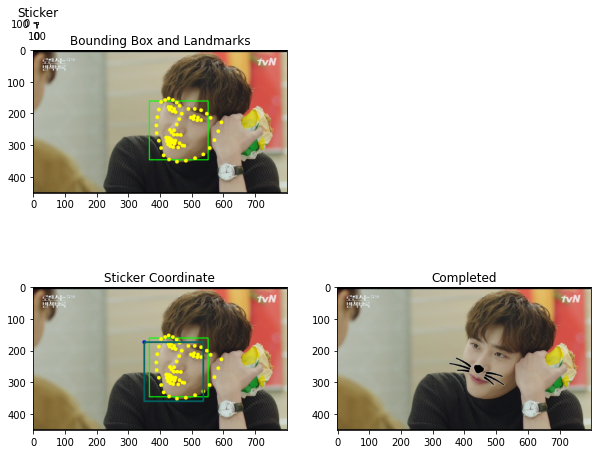

In [31]:
rotate_sticker_2('jongsuck.png')

스티커 사이즈 : (130, 130, 3)
refined_x and y : 75, 103
(x, y) : 140, 168
(w, h) : 130, 130
(p1_x, p1_y) : 140, 168
(x, y) : 140, 168
angle : 24.050298529605158


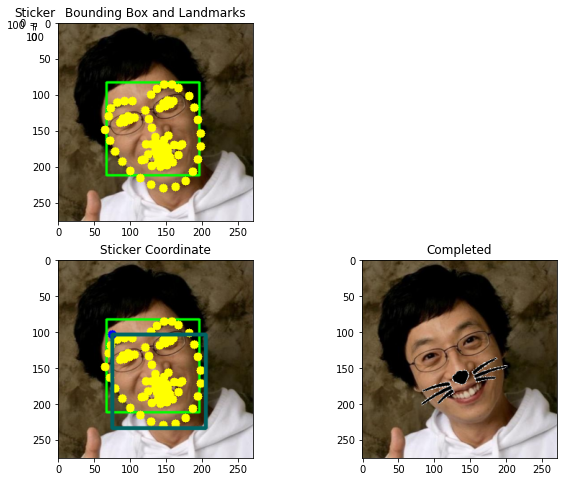

In [32]:
rotate_sticker_2('jaeseok.bmp')

- 해결되었다!

## 6-2) 측면
- 스티커의 형태를 따로 변형시키지 않기 때문에 얼굴 좌측과 우측 영역의 크기 차이가 심하더라도 스티커의 모양은 그대로이다.

(x, y) : 148, 355
(w, h) : 268, 269
(269, 268, 3)
refined_x and y : 14, 221


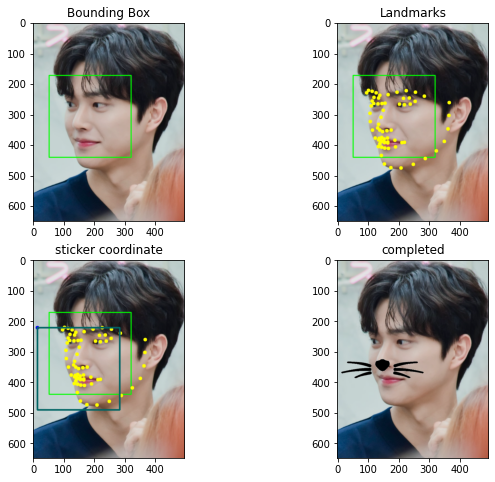

In [33]:
put_sticker('songgang.png','cat-whiskers.png')

(x, y) : 207, 260
(w, h) : 269, 269
(269, 269, 3)
refined_x and y : 73, 126


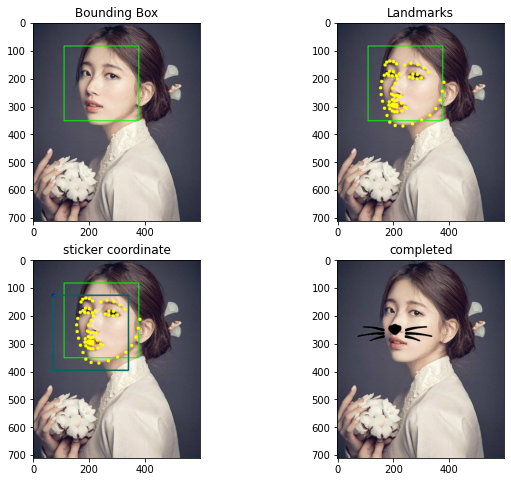

In [34]:
put_sticker('suzy.jpg','cat-whiskers.png')

## 6-3) 실행속도
- 소요시간을 측정해보고자 한다.

In [35]:
def response_time(img_name):
    img_dir = os.getenv('HOME')+'/aiffel/enode3/camera_sticker/images/'
    img_path = img_dir+img_name
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_show = img_rgb.copy()
    # 얼굴 바운딩 박스 검출
    detector_hog = dlib.get_frontal_face_detector()
    dlib_rect = detector_hog(img_rgb, 1)[0]

    # 바운딩 박스 영역 출력
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    cv2.rectangle(img_rgb, (l,t), (r,b), (0, 255, 0), 2, lineType=cv2.LINE_AA)

    # 랜드마크 검출
    model_path = os.getenv('HOME')+'/aiffel/enode3/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    landmark_predictor = dlib.shape_predictor(model_path)
    list_landmarks = []
    points = landmark_predictor(img_rgb,dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

    landmark = list_landmarks[0]
    
    # 인중 중심 좌표 잡기
    w = dlib_rect.width()
    h = dlib_rect.height()
    x = landmark[33][0]
    y = landmark[33][1]

    # 스티커 이미지 가져오기
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))

    # 실제 출력을 위한 top-left 좌표 구하기
    refined_x = x - img_sticker.shape[0] // 2
    # y 좌표는 볼쪽 경계 값 보다 이미지 사이즈 절반 위
    refined_y = y - img_sticker.shape[1]//2

    # 회전할 기준점 잡기
    p1_x = refined_x
    p1_y = refined_y

    p2_x = landmark[6][0]
    p2_y = landmark[6][1]
    
    p3_x = landmark[10][0]
    p3_y = landmark[10][1]

    import math

    row, col = img_sticker.shape[:2]
    angle = math.degrees(math.atan2(p2_x-p1_x,p2_y-p1_y))

    # 반시계 방향으로 회전해야 할 경우
    if (p3_y-p2_y > 0):
        angle = -angle
    rot = cv2.getRotationMatrix2D((col/2, row/2), angle, 1)
    dst = cv2.warpAffine(img_sticker, rot, (col, row), borderValue=(255,255,255))

    # 실제 적용
    sticker_area = img_show[refined_y:refined_y+dst.shape[0], refined_x:refined_x+dst.shape[1]]
    img_show[refined_y:refined_y+dst.shape[0], refined_x:refined_x+dst.shape[1]] = \
    np.where(dst==255,sticker_area,dst).astype(np.uint8)

    plt.imshow(img_show)
    plt.show()

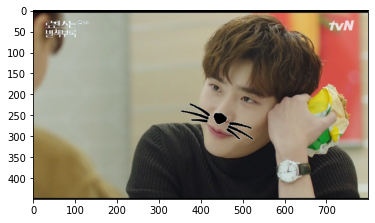

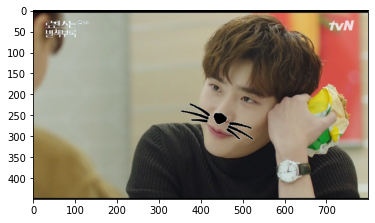

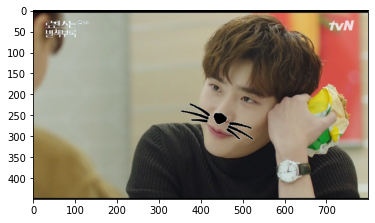

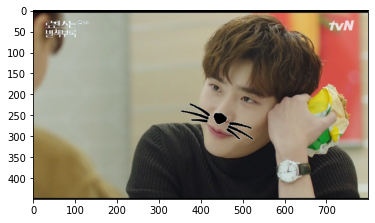

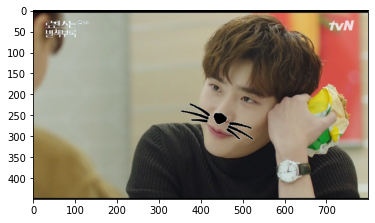

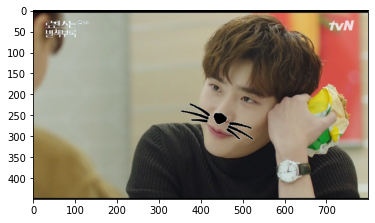

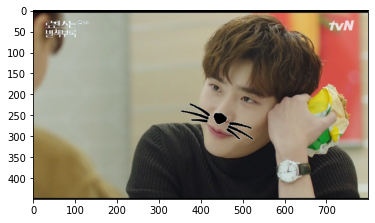

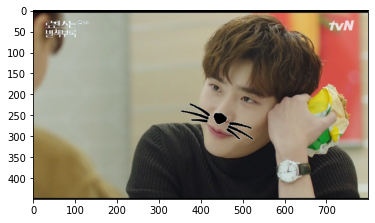

2.09 s ± 27.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [36]:
%%timeit
response_time('jongsuck.png')

- 7번 수행결과 대략 작업 수행에 2.02초 소요되는 것을 확인할 수 있다.

## 6-4) 요구되는 정확도

- 이 작업은 정확도가 엄청 중요한 작업은 아니라고 생각한다.

# 회고
- 코드를 개선하면서 이미지 변환에 대한 여러 개념을 알게 되었는데 다양한 예제로 적용해보고 공부해봐야겠다.
- 삼각함수랑 서먹해진 것 같다. cv 관련된 예제로 다시 개념을 정리해야겠다.
- 초반에 엉뚱하게 좌표를 설정해서 헤매다가 시간을 많이 빼앗겨서 추가적인 변형을 진행해보지 못해서 아쉽다.

## 더 공부해볼 것
- 2차원 상의 변환
- `Ridid Transformation`
- `Shear Transformation`
- `Affine Transformation`
- `Homograpy Transformation`